# Finding coefficients
M C M Wright, ISVR, University of Southampton

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Overview
In this notebook we'll look at how we can detect a sine of a particular period. We'll go into more detail about how sine and cosine functions can be considered orthogonal, like $x$ and $y$ axes in the plane. We'll compute numerical values for the Fourier series coefficient of the sawtooth signal, and deduce a general procedure for obtaining Fourier series coefficients from periodic signals. This notebook should prepare us to calculate the formula for the Fourier coefficients of the sawtooth, or any other periodic signal, in the next notebook.

## Detecting sines

Suppose we have an array `Q` whose columns contain a whole number of periods of a sine. We'd like to find an efficient way of testing which columns have a particular period that we are interested in.

Let's start by constructing an example of `Q` where we know what the periods are: the first column contains one period, the second contains two periods and so on, so the $n$th column of `Q` (where the first column has $n=1$) will be a sampled version of $\sin(2\pi nft)$. We'll plot the resulting columns by adding $3n$ to them to space them out, but instead of just plotting lines we'll fill the area between those lines and the $x$-axis (also suitably shifted). The function we'll use, `fill_between` has to be called separately for each line, so we'll need a `for` loop.

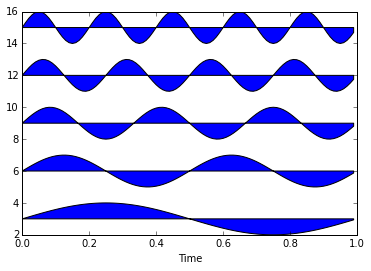

In [2]:
T = 1.0
f = 1/T
N = 5                                   # Number of columns
dt = 1.0/(N*f*20)                       # Timestep to give 20 samples per period at N times f
n, t = meshgrid(arange(1, N+1),
                arange(0, 1.0/f, dt))

Q = sin(2*pi*n*t)

for i in range(N):
    fill_between(t[:,0], 3*(i+1), Q[:, i] + 3*n[:, i])

xlabel('Time')

Suppose we want to detect any columns of `Q` that have $n=2$. What will happen if we multiply each column by $\sin(2\pi \times 2\times ft)$ and plot the results the same way? It's easy enough to find out:

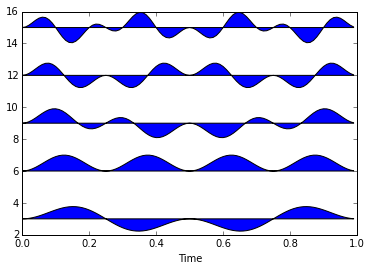

In [3]:
T = 1.0
f = 1/T
N = 5                                   # Number of columns
dt = 1.0/(N*f*20)                       # Timestep to give 20 samples per period at N times f
n, t = meshgrid(arange(1, N+1),
                arange(0, 1.0/f, dt))

Q = sin(2*pi*n*t)

for i in range(N):
    fill_between(t[:, 0], 3*(i + 1), Q[:, i]*sin(2*pi*2*t[:, 0]) + 3*n[:, i])
    
xlabel('Time')

#### Exercise
 - Try changing `sin(2*pi*2*t[:, 0])` in the last line to `sin(2*pi*3*t[:, 0])` and so on. Note what happens in a new cell, which you should insert below this one.
 - Why does the second index into `t` not need to be `i` rather than `0`?

Each of these is the product of two sines, plotted over a whole number of periods. When the two sines have different periods the resulting curve has as much area below the horizontal axis as it has above, meaning its integral should be zero. When they have the same period the area below the curve is entirely positive. 

This suggests that we might be able to detect sines of a given period by multiplying a suspected sine by a sine of that period and integrating the result over a whole period of the fundamental.  In other words we want to find

$$
\int_0^T \sin(2\pi nft)\sin(2\pi mft)\,\mathrm{d}t, \quad n=1,\ldots 5.
$$


If the sines are finely sampled enough, i.e. if `dt` is small enough, then we can get a good estimate of the integral by summing the values and multiplying by `dt`.
Let's try it when $m=2$:

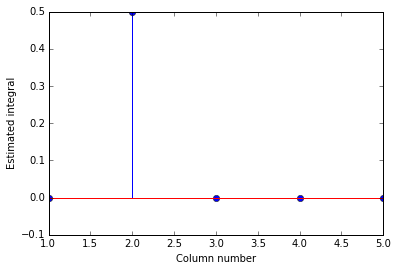

In [3]:
T = 1.0
f = 1/T
N = 5                                   # Number of columns
dt = T/(N*f*20)                       # Timestep to give 20 samples per period at N times f
n, t = meshgrid(arange(1, N+1),
                arange(0, T, dt))
Q = sin(2*pi*n*t)

stem(n[0, :], sum(Q*sin(2*pi*2*t)*dt, axis=0))
xlabel('Column number')
ylabel('Estimated integral')

#### Exercises
For each of the following changes make notes on what you observe in a markdown cell - particularly what happens to the estimated integrals.
- Make a copy of this code cell and try changing `Q*sin(2*pi*2*t)` in the last line to `Q*sin(2*pi*3*t)` and so on. 
- Change the fundamental period `T` from one second to two, and other values.
- Shift the time axis by adding the same amount to the first two arguments of `arange(0, 1.0/f, dt))`.
- Change the line that defines `Q` so that its columns are $5\sin(2\pi nft)$.
- Change the line that defines `Q` again so that its columns are $\cos(2\pi n f t)$.  

Investigate the results of this last change  by making a copy of the code cell higher up where we plotted the products of the sines, changing `Q` to consist of cosines instead of sines.

### My notes
[*Put your observations from the above exercises here*]

## Mathematical statement
What we have observed computationally can be stated mathematically, although we haven't yet proved it. In the  following $m$ and $n$ are non-zero integers and $q$ is an arbitrary real number.

$$
 \int_q^{q+T}
\sin\left(m\frac{2\pi t}{T}\right)
\sin\left(n \frac{2\pi t}{T}\right) \, \mathrm{d}t = 
\begin{cases}
T/2 & m=n, \\
0 & \text{otherwise,}
\end{cases}
$$

so sines can 'detect' sines. Similarly

$$
 \int_q^{q+T}
\cos\left(m\frac{2\pi t}{T}\right)
\cos\left(n \frac{2\pi t}{T}\right) \, \mathrm{d}t = 
\begin{cases}
T/2 & m=n, \\
0 & \text{otherwise,}
\end{cases}
$$

so cosines can 'detect' cosines. But 

$$
 \int_q^{q+T}
\sin\left(m\frac{2\pi t}{T}\right)
\cos\left(n \frac{2\pi t}{T}\right) \, \mathrm{d}t = 0,
$$

even if $m = n$, so sines can't detect cosines or *vice versa*.

####  Exercise
Use trig identities to prove that these statements are true, and put your proof in a markdown cell. Helpful hints:
 - If one of these statements is true for one value of $q$ it's true for all values of $q$. (*how would you prove this?*) 
 - If you choose $q = -T/2$ then you can rewrite the integral as the sum of two integrals, one from $t = -T/2$ to $t=0$ and one from $t=0$ to $t=T/2$. If the integrand is even, i.e. has the same value for $t$ and $-t$ you only need to evaluate one because they'll both have the same value. If it's odd you don't have to evaluate it at all, because they'll cancel out.

## Orthogonality
When we resolved sinusoids into sine and cosine components we remarked that they behaved analogously to $x$ and $y$ co-ordinates in the plane. We can now make this statement more definite. The third identity above is a statement that the sine and cosine functions are orthogonal over an interval containing a whole number of periods of both. But what does that mean?

The expressions on the LHS above are the continuous time equivalents of **scalar products** of vectors. In a scalar product you multiply elements from the two vectors for each index, and then you add up the results for each index. In these **inner products** of functions we multiply them for each value of the argument and then integrate with respect to the argument. If two vectors are orthogonal then their scalar product is zero. The sine and cosine are orthogonal (over a suitable interval) because their inner product (over that interval) is zero.

Because the $x$ and $y$ axes in the plane are orthogonal we can change the $x$ component of a point without it affecting the value of the $y$-component. This might sound obvious if the axes were at, say, $60^\circ$ rather than $90^\circ$. Similarly we can change the amplitudes of the sine and cosine components independently, which we couldn't if we'd chosen two sinusoids that had a phase difference of $\pi/3$ radians rather than $\pi/2$.

We also have the results that sines with different numbers of periods are orthogonal to one another, and the same is true for cosines. This doesn't have an obvious analogy with any property of vectors that we've met, but does suggest that we can think of the coefficients of a Fourier series as vectors in some space that has an infinite number of dimensions that are all at right-angles to each other. Whether that's a useful picture or not depends on what you're trying to do.

## Computing sawtooth coefficients
What happens if we multiply a period of the sawtooth by a sine and integrate it? We can estimate the result by computing; we'll plot graphs of the functions involved and the area we're integrating as well:

In [65]:
import scipy.signal

-0.666666663707


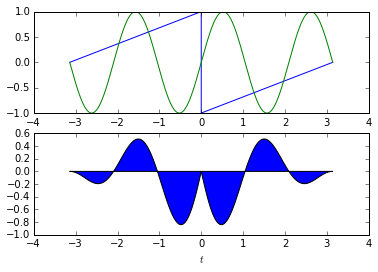

In [89]:
T = 2*pi
dt = 0.0001
t = arange(-T/2, T/2, dt)
S = scipy.signal.sawtooth(t)

m = 3

subplot(2,1,1)
plot(t, S, t, sin(m*t))
subplot(2,1,2)
fill_between(t, 0, S*sin(m*t))
xlabel('$t$')
print(sum(S*sin(m*t))*dt)

#### Exercise 
- Go through the values $n = 1, 2, \ldots 5$ and record the estimated values of $\int_0^T S(t)\sin(mt)\,\mathrm{d}t$ in a markdown cell below.
- Move the $t$ interval so that it runs from $-T/2$ to $T/2$.
- Verify that dividing the results of the integrals by $T/2$ gives the coefficients $b_m$ of the Fourier series.

## Finding formulae for coefficients 
Why did this work? We know that $S(t)$ has a convergent Fourier series representation, in which the cosine coefficients $a_n$ vanish, and that the series converges so we can write

$$
S(t) = \sum_{n=1}^\infty b_n \sin(nt)
$$

If we multiply it by a sine and integrate it we get

$$
\begin{align}
\int_0^T S(t)\times\sin(mt)\,\mathrm{d}t &= \int_0^T\left(\sum_{n=1}^\infty b_n \sin(nt)\right)\times\sin(mt)\,\mathrm{d}t \\
&= \int_0^T\left(\sum_{n=1}^\infty b_n \sin(nt)\times\sin(mt)\right)\,\mathrm{d}t \\
&= \sum_{n=1}^\infty b_n \left(\int_0^T\sin(nt)\times\sin(mt)\,\mathrm{d}t\right)\\
&= \sum_{n=1}^\infty b_n \left(
\begin{cases}
T/2 & m=n, \\
0 & \text{otherwise,}
\end{cases}
\right)\\
&= \frac{T}{2}\times b_m,
\end{align}
$$

which can easily be rearranged to give a formula for $b_m$.

#### Exercise
Each step in this derivation depends on one of the properties listed below, but not in the order listed. Rearrange the order to correspond to the derivation.
 1. Orthogonality of sines with different periods.
 2. Distributive property of multiplication over summation.
 3. Removal of zero terms.
 3. Linearity of integration.

## Beyond the sawtooth

Is this a general result or does it depend on some special property of the sawtooth signal? We took advantage of two things:
 1. The period of $S(t)$ is $2\pi$ so we could write $\sin(nt)$ instead of $\sin(2\pi n t/T)$.
 2. The Fourier series for $S(t)$ has no cosine terms.
 
The first restriction can be lifted by writing the dependence on the period explicitly. The second restriction isn't a problem because sines and cosines are orthogonal, so the presence of cosines won't affect the calculation of sine coefficients, and *vice versa*. 

The orthogonality of sines and cosines also explains why  we prefrred to write the Fourier series in terms of cosines and sines, rather than sinusoids with specified phase &mdash;  it's easier to find $a_n$ and $b_n$ than it is to find $A_n$ and $\phi_n$ because we can find $a_n$ and $b_n$ independently of one another. 

We can therefore replace $S(t)$ with a general function $y(t)$, rearrange and rename variables and remember that it doesn't matter where we start our integration period, to get

$$
b_n = \frac{2}{T}\int_q^{q+T} y(t)\sin\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t,
$$

and a similar argument gives

$$
a_n = \frac{2}{T}\int_q^{q+T} y(t)\cos\left(\frac{2\pi nt}{T}\right)\,\mathrm{d}t.
$$

#### Exercise
Simplify the formula for $a_0$, and interpret it in terms of properties of the signal.

## Conclusion
We've found that forming inner products with sines and cosines doesn't just *detect* the presence of sine and cosine components in a signal, it *measures* how much is there. Evaluating the inner products numerically gives numerical estimates of the Fourier series coefficients, and forms the basis of frequency analysis software. Evaluating the inner products analytically allows us to obtain *formulas* for the coefficients. We'll do that in the next notebook.

## Summary
[Edit this cell to make a summary of everything you've learned from this notebook.]